# INPUT SIGNALS

In [149]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from decimal import Decimal

A = 1

In [150]:
def evaluate_periodic_sine_and_a_half(time_array : list, v_max):
    V_MAX = v_max
    res = []
    for t in time_array:
        t_in_oritginal_period = float(Decimal(str(t)) % Decimal(str(3*np.pi)))

        if t_in_oritginal_period > 0:
            y = V_MAX * np.sin(t_in_oritginal_period)
        else:
            y = V_MAX * np.sin(t_in_oritginal_period + 3*np.pi)
        res.append(y)
    return np.asarray(res)

In [151]:
def evaluate_periodic_exp(time_array : list, v_max):
    V_MAX = v_max
    res = []
    for t in time_array:
        t_in_oritginal_period = float(Decimal(str(t)) % Decimal('10'))

        if t_in_oritginal_period < 0:
            t_in_oritginal_period = 10 - t_in_oritginal_period

        if t_in_oritginal_period < 5:
            y = V_MAX * np.e**(-np.abs(t_in_oritginal_period))
        else:
            y = V_MAX * np.e**(-np.abs(t_in_oritginal_period - 10))
            
        res.append(y)
    return np.asarray(res)

In [152]:
def compute_fft(time_interval, signal, period, window='rectangle'):
  ''' window can be 'rectangle', 'bartlett', 'hanning', 'hamming', 'blackman' or 'blackmanharris '''
  t_step = np.abs(time_interval[0] - time_interval[1])
  points_in_period = int(np.rint(period / t_step))

  if window == 'rectangle':
    signal_for_fft = signal[:points_in_period]
  else:
    try:
      window = getattr(ss, window)(points_in_period+1)
      amount_of_zeros_to_pad = len(signal) - len(window)
      window = np.append(window, [0] * amount_of_zeros_to_pad)
      signal_for_fft = np.multiply(signal, window)[:points_in_period]
    except AttributeError:
      return

  fft = np.fft.fft(signal_for_fft)
  N = signal_for_fft.size
  f = np.fft.fftfreq(N, d=t_step)

  return (f, fft, N)

In [153]:
t_A = np.linspace(-0.002, 0.008, 500)
t_B1 = np.linspace(-3*np.pi, 12*np.pi, 500)
t_B2 = np.linspace(-5, 45, 500)
t_C = np.linspace(-0.01, 0.04, 5000)

x_A = A * np.cos(2 * np.pi * 0.5e3 * t_A)
x_B1 = evaluate_periodic_sine_and_a_half(t_B1, A)
x_B2 = evaluate_periodic_exp(t_B2, A)
x_C = A * (0.5 * np.cos(2*np.pi * 0.9e3 * t_C) + np.cos(2*np.pi * 1e3 * t_C) + 0.5 * np.cos(2*np.pi * 1.1e3 * t_C))

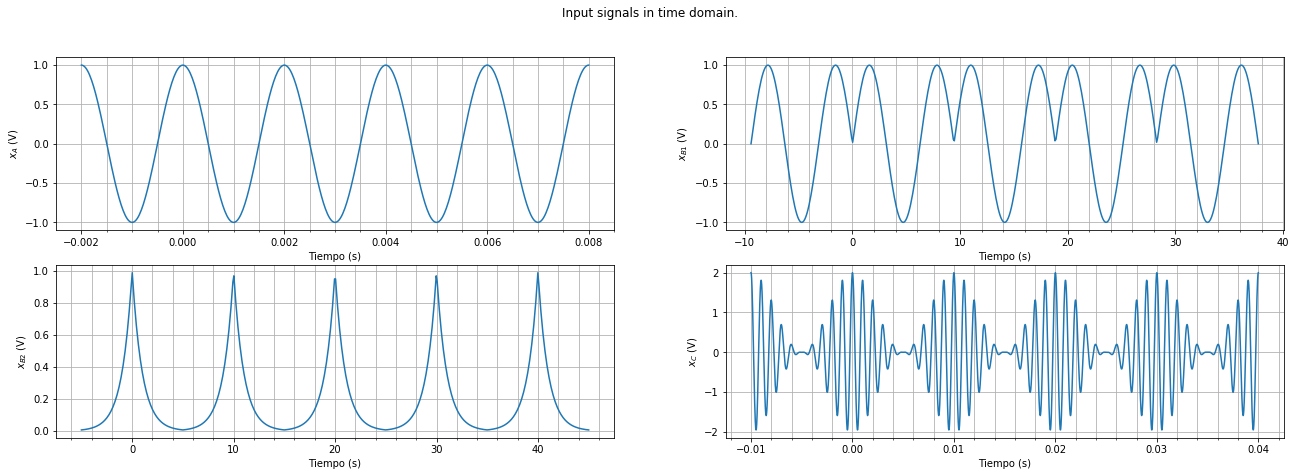

In [154]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Input signals in time domain.')

ax1.plot(t_A, x_A)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('$ x_A $ (V)')

ax2.plot(t_B1, x_B1)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('$ x_{B1} $ (V)')

ax3.plot(t_B2, x_B2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('$ x_{B2} $ (V)')

ax4.plot(t_C, x_C)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Tiempo (s)')
ax4.set_ylabel('$ x_C $ (V)')

fig.show()

In [155]:
f_A, X_A, N_A = compute_fft(t_A, x_A, 0.002)
f_B1, X_B1, N_B1 = compute_fft(t_B1, x_B1, 3*np.pi)
f_B2, X_B2, N_B2 = compute_fft(t_B2, x_B2, 10)
f_C, X_C, N_C = compute_fft(t_C, x_C, 0.01)

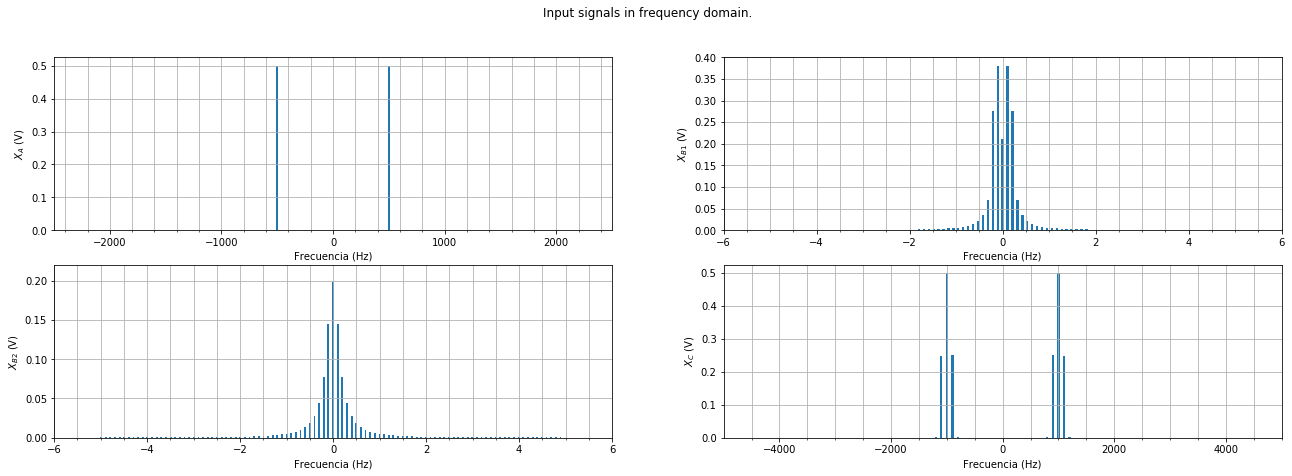

In [156]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Input signals in frequency domain.')

ax1.bar(f_A, np.abs(X_A) * 1/N_A, width=20)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('$ X_A $ (V)')
ax1.set_xlim(left=-2500, right=2500)

ax2.bar(f_B1, np.abs(X_B1) * 1/N_B1, width=0.05)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('$ X_{B1} $ (V)')
ax2.set_xlim(left=-6, right=6)
ax2.set_ylim(top=0.4)

ax3.bar(f_B2, np.abs(X_B2) * 1/N_B2, width=0.04)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frecuencia (Hz)')
ax3.set_ylabel('$ X_{B2} $ (V)')
ax3.set_xlim(left=-6, right=6)
ax3.set_ylim(top=0.22)

ax4.bar(f_C, np.abs(X_C) * 1/N_C, width=40)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frecuencia (Hz)')
ax4.set_ylabel('$ X_C $ (V)')
ax4.set_xlim(left=-5000, right=5000)

fig.show()

# ANTI-ALIASING FILTER

In [157]:
def apply_aaf(input_time, input_signal_in_time, input_freq, input_signal_in_frequency, f_aaf):
    tau = 2 * f_aaf

    aaf_pulse = [0] * int(len(input_signal_in_frequency))
    for i in range(len(input_freq)):
        if np.abs(input_freq[i]) < (tau / 2):
            aaf_pulse[i] = 1

    res_freq = np.multiply(input_signal_in_frequency, aaf_pulse)
    res_time = np.fft.ifft(res_freq)

    return (res_time, res_freq)

In [158]:
f_aaf_low = 8
f_aaf_high = 1.8e3

x_A_filtered, X_A_filtered = apply_aaf(t_A, x_A, f_A, X_A, f_aaf_high)
x_B1_filtered, X_B1_filtered = apply_aaf(t_B1, x_B1, f_B1, X_B1, f_aaf_low)
x_B2_filtered, X_B2_filtered = apply_aaf(t_B2, x_B2, f_B2, X_B2, f_aaf_low)
x_C_filtered, X_C_filtered = apply_aaf(t_C, x_C, f_C, X_C, f_aaf_high)

Prolonging the time arrays for better visualisation

In [159]:
x_A_filtered = np.tile(x_A_filtered, 5)
x_B1_filtered = np.tile(x_B1_filtered, 5)
x_B2_filtered = np.tile(x_B2_filtered, 5)
x_C_filtered = np.tile(x_C_filtered, 5)

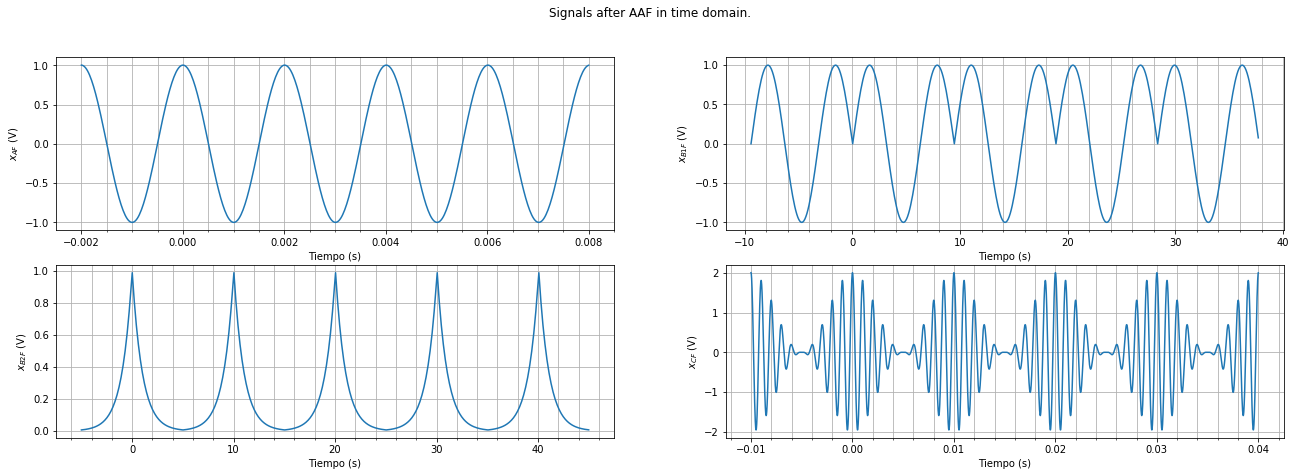

In [160]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF in time domain.')

ax1.plot(t_A, x_A_filtered)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('$ x_{AF} $ (V)')

ax2.plot(t_B1, x_B1_filtered)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('$ x_{B1F} $ (V)')

ax3.plot(t_B2, x_B2_filtered)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('$ x_{B2F} $ (V)')

ax4.plot(t_C, x_C_filtered)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Tiempo (s)')
ax4.set_ylabel('$ x_{CF} $ (V)')

fig.show()

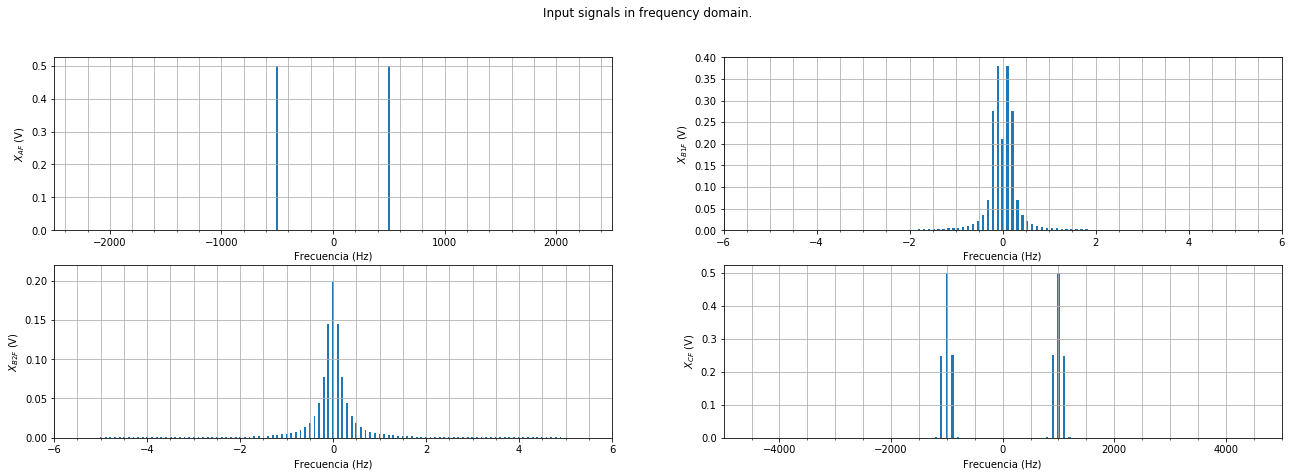

In [161]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Input signals in frequency domain.')

ax1.bar(f_A, np.abs(X_A_filtered) * 1/N_A, width=20)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('$ X_{AF} $ (V)')
ax1.set_xlim(left=-2500, right=2500)

ax2.bar(f_B1, np.abs(X_B1_filtered) * 1/N_B1, width=0.05)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('$ X_{B1F} $ (V)')
ax2.set_xlim(left=-6, right=6)
ax2.set_ylim(top=0.4)

ax3.bar(f_B2, np.abs(X_B2_filtered) * 1/N_B2, width=0.04)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frecuencia (Hz)')
ax3.set_ylabel('$ X_{B2F} $ (V)')
ax3.set_xlim(left=-6, right=6)
ax3.set_ylim(top=0.22)

ax4.bar(f_C, np.abs(X_C_filtered) * 1/N_C, width=40)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frecuencia (Hz)')
ax4.set_ylabel('$ X_{CF} $ (V)')
ax4.set_xlim(left=-5000, right=5000)

fig.show()

# NATURAL SAMPLING 

## After AAF
$ \tau_{ns} $ can be anything from $ 0 $ to the sampling period $ T_{ns} $

In [162]:
def evaluate_pulse_train(time_array, f):
    res = []

    for t in time_array:
        t_in_oritginal_period = float(Decimal(str(t)) % Decimal(str(2 * 1 / f)))
        if t_in_oritginal_period > (0.1 * 2 * 1 / f):
            res.append(0)
        elif t_in_oritginal_period < -(0.9 * 2 * 1 / f):
            res.append(1)
        elif t_in_oritginal_period > 0:
            res.append(1)
        else:
            res.append(0)

    return res

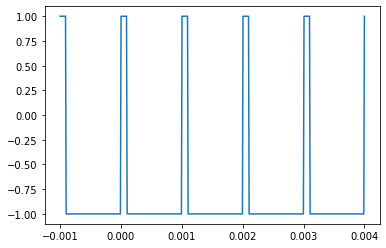

In [174]:
x = np.linspace(-1e-3, 4e-3, 500)
sq = ss.square(2 * np.pi * 1e3 * x, duty=0.1)
plt.plot(x, sq)

In [181]:
f_ns_low = 600e3 / (2**14)
f_ns_high = 600e3 / (2**7)
duty = 0.01

natural_sampling_signal_A = (ss.square(2 * np.pi * f_ns_high * t_A, duty=duty) + 1) /2
natural_sampling_signal_B1 = (ss.square(2 * np.pi * f_ns_low * t_B1, duty=duty) + 1) / 2
natural_sampling_signal_B2 = (ss.square(2 * np.pi * f_ns_low * t_B2, duty=duty) + 1) / 2
natural_sampling_signal_C = (ss.square(2 * np.pi * f_ns_high * t_C, duty=duty) + 1) / 2

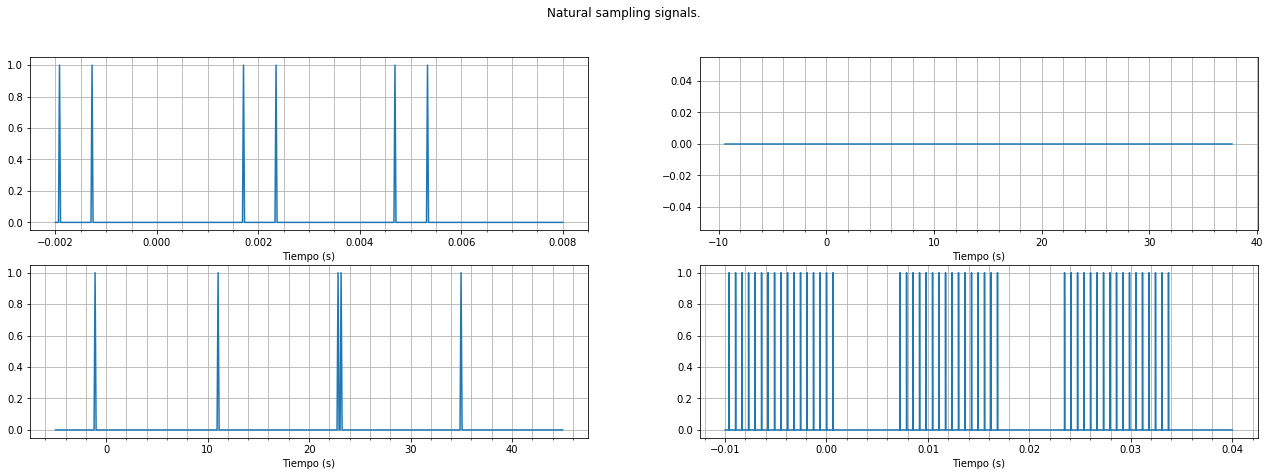

In [182]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Natural sampling signals.')

ax1.plot(t_A, natural_sampling_signal_A)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Tiempo (s)')

ax2.plot(t_B1, natural_sampling_signal_B1)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Tiempo (s)')

ax3.plot(t_B2, natural_sampling_signal_B2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Tiempo (s)')

ax4.plot(t_C, natural_sampling_signal_C)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Tiempo (s)')

fig.show()

In [183]:
x_A_filtered_ns = np.multiply(x_A_filtered, natural_sampling_signal_A)
x_B1_filtered_ns = np.multiply(x_B1_filtered, natural_sampling_signal_B1)
x_B2_filtered_ns = np.multiply(x_B2_filtered, natural_sampling_signal_B2)
x_C_filtered_ns = np.multiply(x_C_filtered, natural_sampling_signal_C)

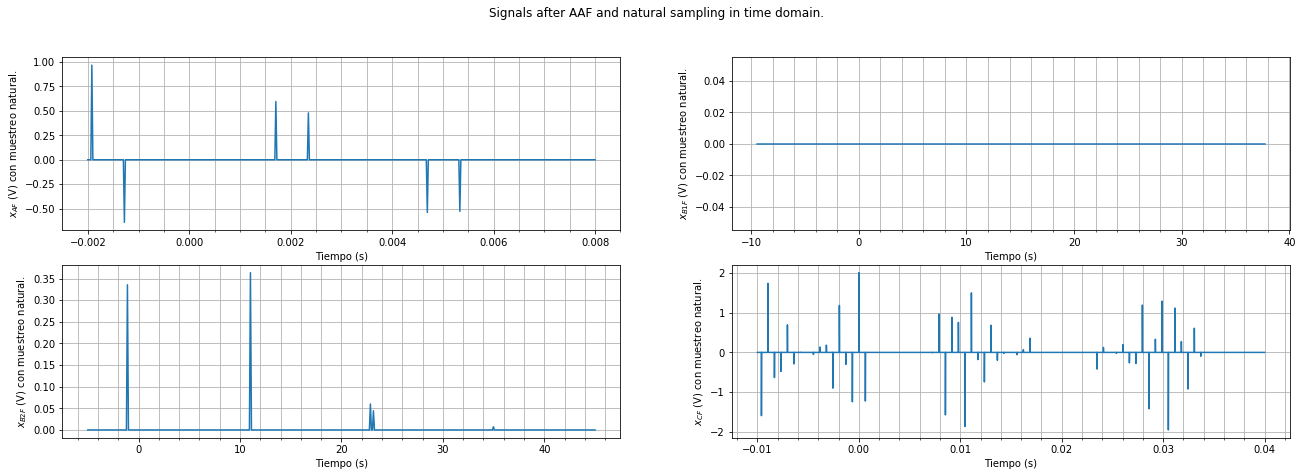

In [184]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and natural sampling in time domain.')

ax1.plot(t_A, x_A_filtered_ns)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('$ x_{AF} $ (V) con muestreo natural.')

ax2.plot(t_B1, x_B1_filtered_ns)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('$ x_{B1F} $ (V) con muestreo natural.')

ax3.plot(t_B2, x_B2_filtered_ns)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('$ x_{B2F} $ (V) con muestreo natural.')

ax4.plot(t_C, x_C_filtered_ns)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Tiempo (s)')
ax4.set_ylabel('$ x_{CF} $ (V) con muestreo natural.')

fig.show()

In [185]:
f_A_filtered_ns, X_A_filtered_ns, N_A_filtered_ns = compute_fft(t_A, x_A_filtered_ns, 0.002)
f_B1_filtered_ns, X_B1_filtered_ns, N_B1_filtered_ns = compute_fft(t_B1, x_B1_filtered_ns, 3*np.pi)
f_B2_filtered_ns, X_B2_filtered_ns, N_B2_filtered_ns = compute_fft(t_B2, x_B2_filtered_ns, 10)
f_C_filtered_ns, X_C_filtered_ns, N_C_filtered_ns = compute_fft(t_C, x_C_filtered_ns, 0.01)

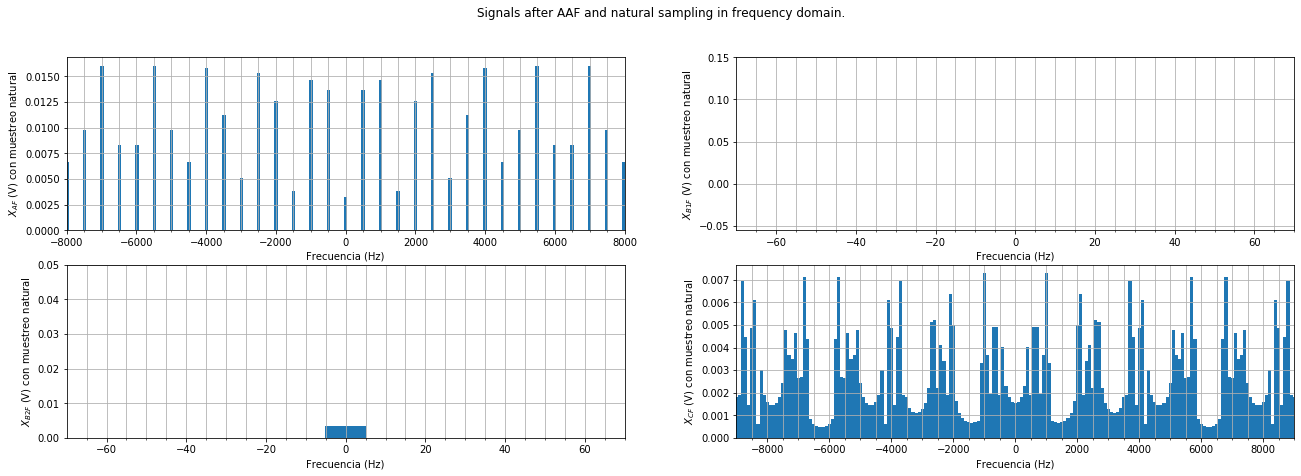

In [186]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Signals after AAF and natural sampling in frequency domain.')

ax1.bar(f_A_filtered_ns, np.abs(X_A_filtered_ns) * 1/N_A_filtered_ns, width=100)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('$ X_{AF} $ (V) con muestreo natural')
ax1.set_xlim(left=-8000, right=8000)

ax2.bar(f_B1_filtered_ns, np.abs(X_B1_filtered_ns) * 1/N_B1_filtered_ns, width=0.5)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('$ X_{B1F} $ (V) con muestreo natural')
ax2.set_xlim(left=-70, right=70)
ax2.set_ylim(top=0.15)

ax3.bar(f_B2_filtered_ns, np.abs(X_B2_filtered_ns) * 1/N_B2_filtered_ns, width=0.2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frecuencia (Hz)')
ax3.set_ylabel('$ X_{B2F} $ (V) con muestreo natural')
ax3.set_xlim(left=-70, right=70)
ax3.set_ylim(top=0.05)

ax4.bar(f_C_filtered_ns, np.abs(X_C_filtered_ns) * 1/N_C_filtered_ns, width=100)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frecuencia (Hz)')
ax4.set_ylabel('$ X_{CF} $ (V) con muestreo natural')
ax4.set_xlim(left=-9000, right=9000)

fig.show()